Question 8 -


Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding


Insights to be drawn -


●           Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.


●         Get all the episode names, whose average rating is more than 8 for every season 


●         Get all the episode names that aired before May 2019


●         Get the episode name from each season with the highest and lowest rating 


●         Get the summary for the most popular ( ratings ) episode in every season

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json

In [ ]:


# Read the data from the URL
#url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
df = pd.read_json("/content/drive/MyDrive/Colab Notebooks/westworld_episodes.json")



In [ ]:
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,Westworld,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Westworld,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,Westworld,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Westworld,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Westworld,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [ ]:
# Get all the overall ratings for each season and compare the ratings using plots
season_ratings = df.groupby('season')['average rating'].mean()



In [ ]:
print("Overall Ratings for Each Season:")
season_ratings.head()

Overall Ratings for Each Season:


season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: average rating, dtype: float64

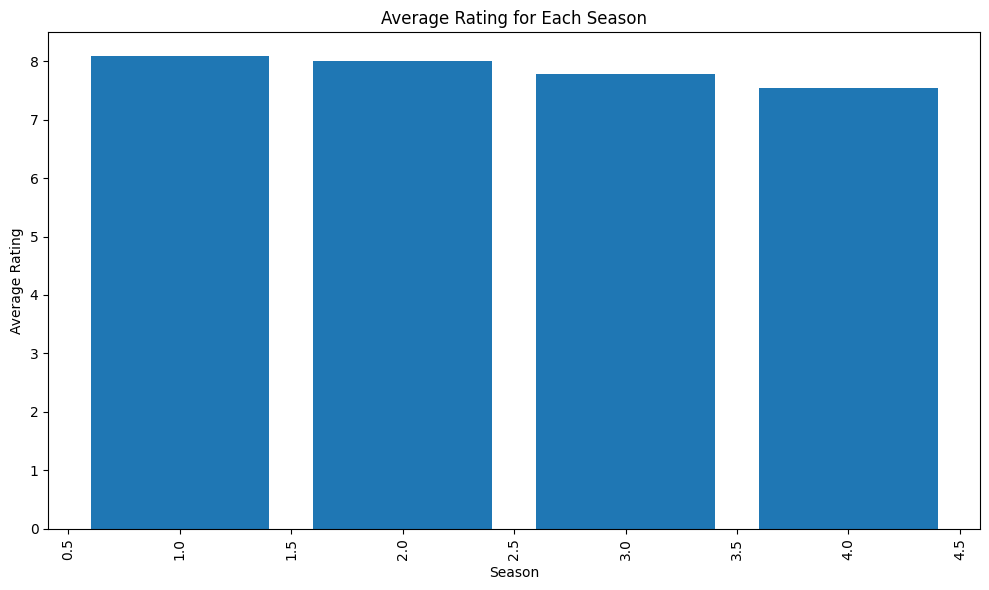

In [ ]:
# Bar plot for season ratings
plt.figure(figsize=(10, 6))
plt.bar(season_ratings.index, season_ratings.values)
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Rating for Each Season')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [ ]:
# Get all the episode names with average rating > 8 for every season
high_rated_episodes = df[df['average rating'] > 8.0]
high_rated_episodes = high_rated_episodes.groupby(['season', 'name'])['average rating'].mean().reset_index()



In [ ]:
high_rated_episodes.head()

,season,name,average rating
0,1,Westworld,8.600000
1,2,Westworld,8.533333


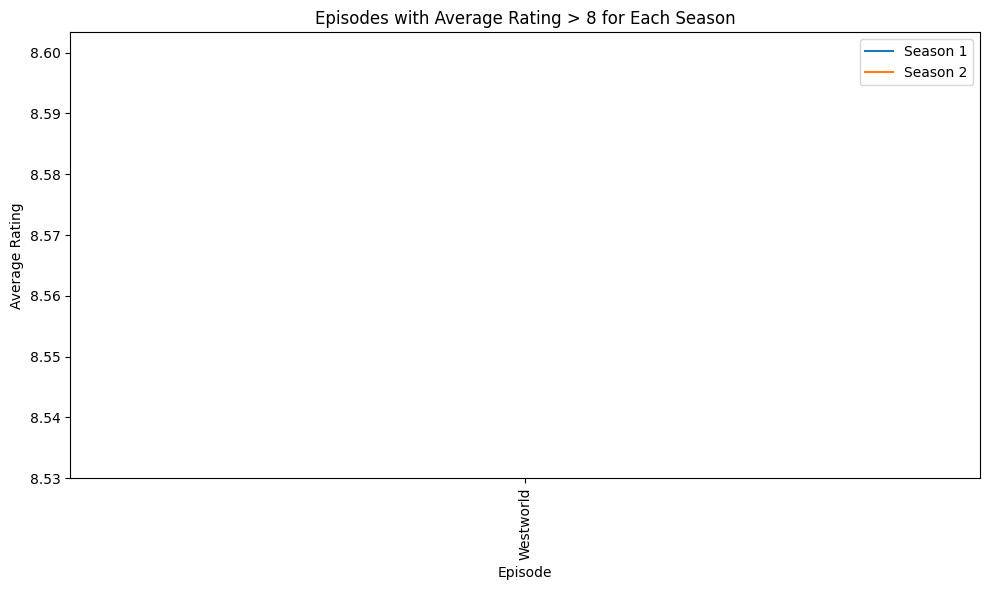

In [ ]:
# Plot episode names with average rating > 8 for each season
plt.figure(figsize=(10, 6))
for season, data in high_rated_episodes.groupby('season'):
    plt.plot(data['name'], data['average rating'], label=f"Season {season}")
plt.xlabel('Episode')
plt.ylabel('Average Rating')
plt.title('Episodes with Average Rating > 8 for Each Season')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Get all the episode names that aired before May 2019
episodes_before_may_2019 = df[df['airdate'] < '2019-05']



In [ ]:
episodes_before_may_2019.head(3)

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,Westworld,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Westworld,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,Westworld,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [ ]:
episodes_before_may_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   20 non-null     int64  
 1   url                  20 non-null     object 
 2   name                 20 non-null     object 
 3   season               20 non-null     int64  
 4   number               20 non-null     int64  
 5   type                 20 non-null     object 
 6   airdate              20 non-null     object 
 7   airtime              20 non-null     object 
 8   runtime              20 non-null     int64  
 9   average rating       20 non-null     float64
 10  summary              20 non-null     object 
 11  medium image link    20 non-null     object 
 12  original image link  20 non-null     object 
dtypes: float64(1), int64(4), object(8)
memory usage: 2.2+ KB


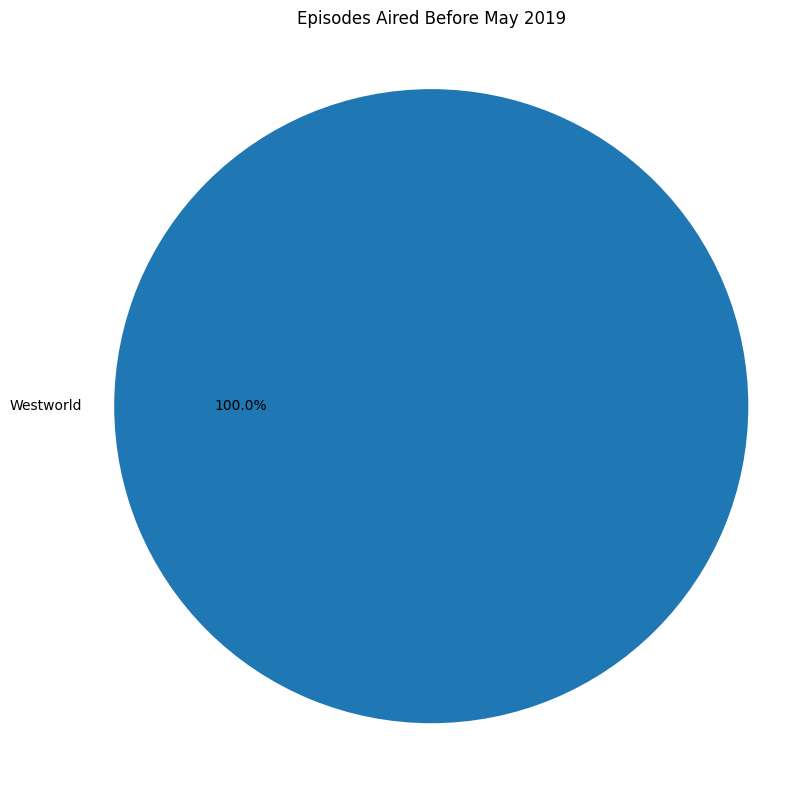

In [ ]:
# Pie chart for the count of episodes aired before May 2019
plt.figure(figsize=(8, 8))
plt.pie(episodes_before_may_2019['name'].value_counts(), labels=episodes_before_may_2019['name'].unique(), autopct='%1.1f%%')
plt.title('Episodes Aired Before May 2019')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
# Get the episode name from each season with the highest and lowest rating
highest_rating_episodes = df.groupby('season')['average rating'].idxmax()
lowest_rating_episodes = df.groupby('season')['average rating'].idxmin()
highest_rating_episodes_info = df.loc[highest_rating_episodes, ['season', 'name', 'average rating']]
lowest_rating_episodes_info = df.loc[lowest_rating_episodes, ['season', 'name', 'average rating']]



In [ ]:
highest_rating_episodes_info

,season,name,average rating
9,1,Westworld,8.7
17,2,Westworld,8.7
20,3,Westworld,8.0
32,4,Westworld,7.8


In [ ]:
lowest_rating_episodes_info

,season,name,average rating
2,1,Westworld,7.6
14,2,Westworld,7.6
25,3,Westworld,7.5
28,4,Westworld,7.1


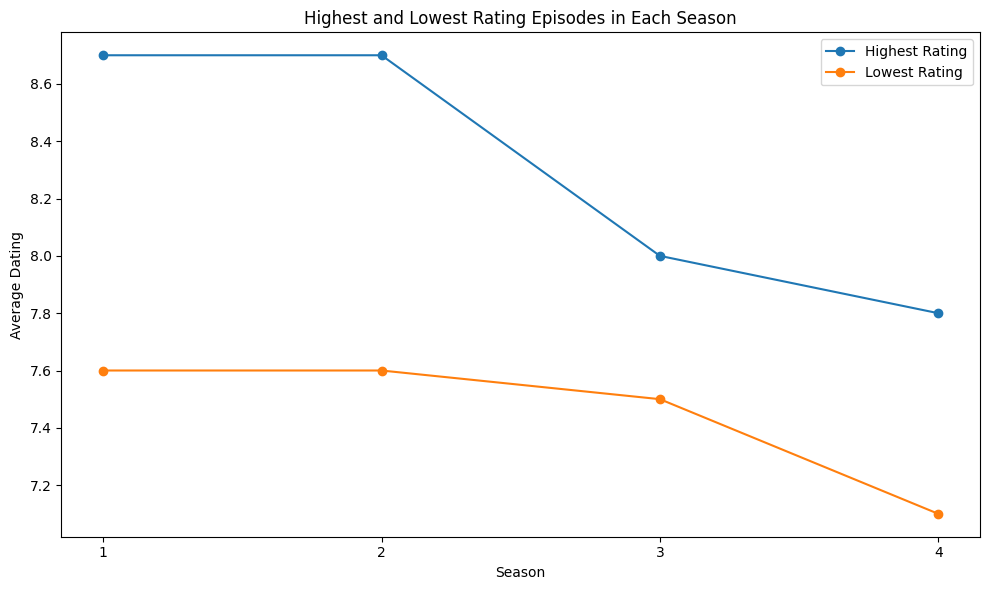

In [ ]:
# Line plot for the highest and lowest rating episodes in each season
plt.figure(figsize=(10, 6))
plt.plot(highest_rating_episodes_info['season'], highest_rating_episodes_info['average rating'], marker='o', label='Highest Rating')
plt.plot(lowest_rating_episodes_info['season'], lowest_rating_episodes_info['average rating'], marker='o', label='Lowest Rating')
plt.xlabel('Season')
plt.ylabel('Average Dating')
plt.title('Highest and Lowest Rating Episodes in Each Season')
plt.xticks(highest_rating_episodes_info['season'])
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Get the summary for the most popular (highest ratings) episode in every season
most_popular_episodes = df.groupby('season')['average rating'].idxmax()
most_popular_episodes_info = df.loc[most_popular_episodes, ['season', 'name', 'summary']]



In [ ]:
most_popular_episodes_info

,season,name,summary
9,1,Westworld,Delores finds out the truth about William's fa...
17,2,Westworld,Another of Westworld's Host revolutionaries is...
20,3,Westworld,"If you're stuck in a loop, try walking in a st..."
32,4,Westworld,God is bored.


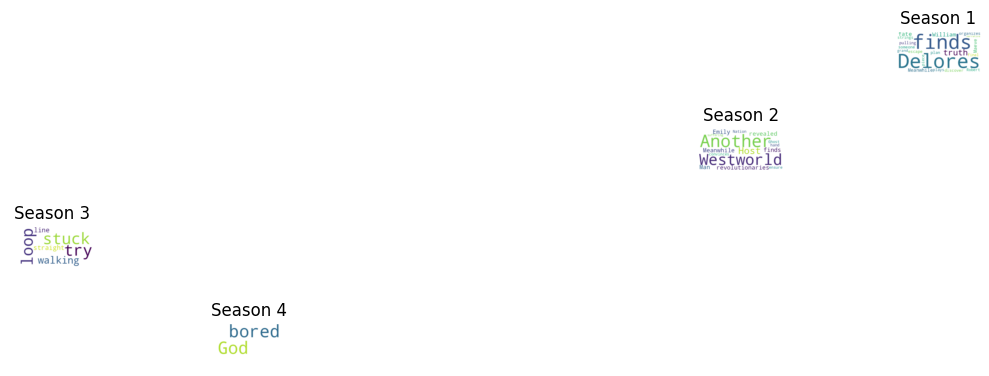

In [ ]:
# Word cloud for the summary of the most popular episodes in each season


plt.figure(figsize=(10, 6))
for i, episode in most_popular_episodes_info.iterrows():
    wc = WordCloud(background_color='white').generate(episode['summary'])
    plt.subplot(6, 10, i+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Season {episode['season']}")
plt.tight_layout()
plt.show()